# Assignment 2 - Bank Assignment

## UNI: chb2132

## Name: Chloe Blanchard

### Please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [181]:
# import data:

%cd /Users/user/Desktop/chb2132/python/Bank_Assignment

/Users/user/Desktop/chb2132/python/Bank_Assignment


In [182]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

# print(len(df))

df1 = pd.read_csv("banklist.csv")
df1.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


## Question 1 (20 points)

In [183]:
# Look @ dataset + confirm no missing values in any categorical column
# --> If there are, replace w/ the value: 'M'.

# Consider Acquiring Inst. column: insts. that hold various banks.
# --> What are the top 4 Acquiring Insts.?

In [184]:
# Question 1.1

# Method 1:

# Checking the data frame, shows us that there are 555 entries in banklist, and 555 are non-null for all columns
# aka this means there is no missing data and therefore no missing values for any columns, categorical or not
# therefore there is no need to include any impute function for 'M' values, and we can move on to part 2

df1.head()
df1.info()

# Method 2:

# Creating null by aggregating the categorical columns from the dataset

null = df1[['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution', 'Closing Date', 'Updated Date']]

# 0 sum outcome indicates no null values across the entire dataset
# --> Tf no missing vals in categorical columns

null.sum()

# sort values a.sort_values(ascending=False).iloc[0:5]
# --> ascending = F allows top down result eval. (not end of list)

df2 = df1['Acquiring Institution'].value_counts()
df2.sort_values(ascending = False).iloc[0:4]

# Top 4 Acquiring Insts. Are As Follows:

# 1: No Acquirer (31)
# 2: State Bank and Trust Company (12)
# 3: First Citizen Bank and Trust Company (11)
# 4: Ameris Bank (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
Name: Acquiring Institution, dtype: int64

In [185]:
# How many city names start with the letter 'A' and how many don't? 
# --> Use the str vectorized series attribute

In [186]:
# Question 1.2

# Using str.startswith to check for City name String values starting with Str val 'A'
# Dropping duplicates and printing the resulting saved value to display # unique city names starting w/ 'A'

start1 = df1[df1['City'].str.startswith('A')]['City']
start1 = start1.drop_duplicates()
len(start1)

# Result is 19 city names (after dropping duplicates) starting with 'A'

19

In [187]:
# Question 1.2 Continued

# Checking for the remaining non-'A' city name count (after dropping duplicates)

start2 = df1[~df1['City'].str.startswith('A')]['City']
start2 = start2.drop_duplicates()
len(start2)

# Result is 407 city names (after dropping duplicates) that start with String value that is *not* 'A'

407

In [188]:
# What are the cities whose names consist of 2 words?
# --> How many are there?

In [189]:
# Question 1.3

# Using regular str.split + str.len on the string values for City names in City column in df
# Will create saved value we can remove duplicates from to show # of (length 2) 2-word city name Strings

two_word_city = df1[df1['City'].str.split().str.len() == 2]['City']
two_word_city = two_word_city.drop_duplicates()
two_word_city

# Result is output below--provides the overall count as well: 108 unique 2-word city name Strings

2              Saint Elmo
4             New Orleans
5      Cottonwood Heights
14         Peachtree City
17               San Juan
              ...        
495           Culver City
507         Newport Beach
532          White Plains
543       Shelby Township
547         Sierra Blanca
Name: City, Length: 108, dtype: object

## Question 2 (50 points)

In [190]:
# Use apply + group by methods to obtain city for ea. state corresponding to smallest no. certificates (CERT col.)
# --> Display only city-state combos w/ no. certificates (3 column df) where Acquiring Inst. 
#     contains 3 words (can count symbols like "&" et. cetera, as words for ea. Acquiring Inst.)

In [191]:
# Question 2

# Subsetting original df (df1) and using str.split/str.len on Acquiring Inst. column for 3-word values
# Using drop_duplicates to drop any duplicate values

three_term_AI = df1[df1['Acquiring Institution'].str.split().str.len() == 3]['Acquiring Institution']
three_term_AI = three_term_AI.drop_duplicates()

# Now we want to select from original df (df1) all of the corresponding index values for diltered df
# for data subset with original/complete rows for all row index/values where Acquiring Inst. is len 3

threetai_index = df1.loc[three_term_AI.index]

# Filtering using the pandas python groupby method and pandas python idxmin method so we can group by State
# and then look at the CERT value for each state + take min. CERT val for each ST, then set to st_min_certs

st_min_certs = threetai_index.groupby('ST')['CERT'].idxmin()
st_min_certs = st_min_certs.drop_duplicates()

# Now we want to use the filtered df to select from so we can only choose from the existing rows that have a
# 3-word (including special chars) Acquiring Inst., choosing the rows corresponding to min. CERT for each ST

threetai_mincerts = threetai_index.loc[st_min_certs]
threetai_mincerts = threetai_mincerts.drop_duplicates()

# Displaying only the specified 3 columns for df where: filtered (3-word Acquiring Institution) +
# grouped (by State/ST) + filtered (min. CERT value for each State), showing City/ST/CERT only

threetai_mincerts[['City', 'ST', 'CERT']]

# modified example found in python cookbook after writing this code, including this here for my own records ^_^
# m2 = df1.groupby('ST').apply(lambda subf: subf['City'][subf['CERT'].idxmin()])

,City,ST,CERT
327,Fort Deposit,AL,24957
50,Scottsdale,AZ,34527
404,Bakersfield,CA,23266
122,Greenwood Village,CO,21132
542,Stamford,CT,19183
20,Crestview,FL,17557
53,Douglasville,GA,21649
117,Johnston,IA,14194
467,Macomb,IL,5757
145,Evansville,IN,4392


## Question 3 (30 points)

In [ ]:
# Obtain CERT column dist. across all records + subset original df for records where CERT < 10th percentile of total
# --> Use a pivot table method on subset for min/max/avg CERT of ea. ST combination where rec. no. > 1 
# --> Index for state + 4 columns: ST, min_CERT, max_CERT, mean_CERT for CERT *no multi-lvl dfs
# --> 3 states on x-axis, corr. summary stats on 3 bars in stacked bar chart

,ST,max_CERT,mean_CERT,min_CERT
0,FL,9619.0,7645.500000,5672.0
1,GA,10054.0,4625.857143,151.0
2,IL,10086.0,5583.750000,916.0
3,KS,4754.0,4040.800000,1361.0
4,MN,9744.0,6624.666667,1909.0
5,MO,8266.0,4889.500000,1056.0
6,OH,8966.0,7797.500000,6629.0
7,OK,9873.0,4167.250000,416.0
8,TN,9961.0,7202.333333,1690.0
9,UT,1252.0,1250.500000,1249.0


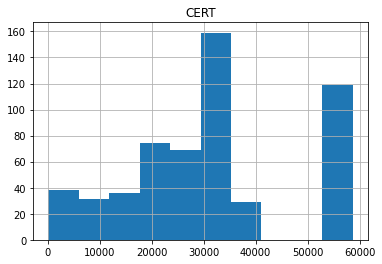

In [213]:
# Question 3

# Subsetting original df (df1) to produce a histogram for the CERT column of our data, since default is 10 columns
# Might possibly get an idea of what data is lower/beneath the 10th percentile of the total/agg for CERT values

CERT_hist = df1.hist(column = 'CERT')
CERT_hist

# Using np.percentile to look specifically at the CERT column of data, identify the actual numeric value/cutoff
# point that marks the 10th percentile of the total CERT data (will be upper bound for our subsetting params)

CERT_col = df1['CERT']
certile = np.percentile(CERT_col, 10)

# creating subset of df for the entries that fall below computed val. delineating 10th percentile of overall CERT
# dropping duplicates just in case/just to make a habit of the drop_duplicates() function

cert_10s = df1[df1['CERT'] < certile]['CERT']
cert_10s = cert_10s.drop_duplicates()

# obtaining the full row of data for each of the entries kept (those < 10th percentile of overall CERT)
# dropping duplicates just in case/just to make a habit of the drop_duplicates() function

cert_dex = df1.loc[cert_10s.index]
cert_dex = cert_dex.drop_duplicates()

# filtering the subset so only states with multiple entries/instances are kept
# dropping duplicates just in case/just to make a habit of the drop_duplicates() function

dex_idx = cert_dex.groupby('ST').filter(lambda x: len(x) > 1)
dex_idk = dex_idx.drop_duplicates()

# unused code from prior dict. approach to the problem not making correct use of pivot_table and aggfunc

# min_CERT = dex_idx.groupby('ST')['CERT'].min()
# max_CERT = dex_idx.groupby('ST')['CERT'].max()
# mean_CERT = dex_idx.groupby('ST')['CERT'].mean()

#CERT_dict = {'ST': ['ST'], 'min_CERT': ['min'],'max_CERT': ['max'], 'mean_CERT': ['mean']}
#dex_idx.groupby('ST').agg(CERT_dict)

# using the pandas pivot_table function on the subsetted, filtered data to re-establish an index by state
# the pivot table function takes the existing values in the CERT column and provides a pivot table for the three
# aggfunc transformations that I specified ( min, max, np.mean), with the columns renamed to the proper headings

cert_st_table = pd.pivot_table(dex_idx, index = 'ST', values = 'CERT', aggfunc = {
                    'CERT' : [min, max, np.mean]}).reset_index().rename(columns={
                    'min' : 'min_CERT', 'max' : 'max_CERT', 'mean' : 'mean_CERT'})

# display the final result! see out bar graph of first 3 rows/entries/states and CERT values (3))

cert_st_table

#### Display a bar plot for the first 3 states in the resulting data frame: 
#### Put 3 states on the x-axis w/ 3 summary stats in stacked bar plot (3 bars x  3 states)

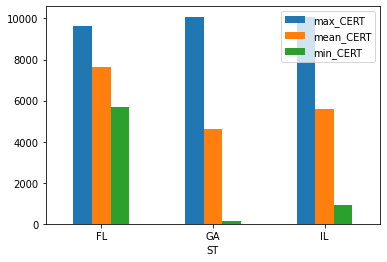

In [223]:
# using plot.bar and the iloc to splice the dataset from above so we are graphing only the first three index vals
# since the splice will take the interval from 0 to 3 exclusive (aka not including the 4th entry at index 3)
# specified x = 'ST' so x-axis and the 3 states are explicitly labeled, instead of index vals (0, 1, 2)

cert_plot = cert_st_table.iloc[0:3].plot.bar(x = 'ST', rot=0)